## Industry Standard process for Data Mining
- Business understanding
- Data understanding
- Data Preparation
- Modeling
- Evaluation
- Deployment

![](machine_learning_proc.PNG)

## Introduction to Pandas
In order to make a visualization, we need data and we usually need it in an organized tablular form suitable for plotting. The pandas library provides easy-to-use data structures and data analysis tools that you can use to make your data easier to plot. An important data structure of the pandas library is a fast and efficient object for data manipulation called a `DataFrame`. 

![](images/pandasDataFrame.png)

## Loading the data

In [3]:
# Import libraries
import pandas as pd

## Load an excel file

In [11]:
filename = 'C:\Users\ajayi\OneDrive\Desktop\Class_Data\Data\car_financing.xlsx'   # the directory where you stored your data
df = pd.read_excel(filename)

## Load a CSV file

In [8]:
# Load car loan data from a csv file
filename = 'C:\Users\ajayi\OneDrive\Desktop\Class_Data\Data\car_financing.csv'
df = pd.read_csv(filename)


## Creating a Dataframe from a dictionary

In [13]:
frame = pd.DataFrame( {'id':['ball','pencil','pen','mug','ashtray'], 
                        'price': [12.33,11.44,33.21,13.23,33.62]}) 
frame

,id,price
0,ball,12.33
1,pencil,11.44
2,pen,33.21
3,mug,13.23
4,ashtray,33.62


## Basic Operations

1. Ensure that you correctly load the data. 
2. See what kind of data you have. 
3. Check the validity of your data.

### Viewing the first and last 5 rows

In [6]:
# Select top N number of records (default = 5)



In [7]:
# Select bottom N number of records (default = 5)



## Check the columns in the data
- This might not be a good idea if the dimensions of the data is very large

In [7]:
# examine the columns of the data


### Check the column data types

In [17]:
# Check the column data types
# For example, you can wrongly assume the values in one of your columns is 
# a int64 instead of a string. 



In [14]:
# get the number of rows and columns in your dataframe


In [22]:
# The info method gives the column datatypes + number of non-null values
 


In [23]:
## Explicitly check for missing values


In [11]:
## perform a simple descriptive statistics
# it only gives the stats for the numeric columns


## Pandas series
- A series is a single column in a dataframe

In [12]:
df['Principal Paid']  # this is a pandas series (confirm by checking the type)

pandas.core.series.Series

In [9]:
# selecting multiple features (columns)


In [19]:
# Let's start by looking at the car_type
# Find the number of times each category occurs



## Pandas Slicing

In [21]:
# There are two ways to select a column name
# Approach 1


# Approach 2


# You can rename one or more features
#df.rename(columns = {'Principal Paid': 'Principal_paid'})

# confirm the changes


### Subsetting the data

In [30]:
#df.loc[:, 'car_type'].head()   # pandas series

#df.loc[:, ['car_type']].head()  # pandas dataframe


# select car_type and interest paid for just rows 10 and 15
#df.loc[[10,15], ['car_type', 'Interest Paid']]

## Filtering

In [34]:
# filter out the data for the Toyota Sienna column


# check the data

#car_sienna.head()


In [22]:
# suppose I only subset the data
car_corolla = df['car_type'] == 'Toyota Corolla'

car_corolla.head()

0    False
1    False
2    False
3    False
4    False
Name: car_type, dtype: bool

In [20]:
# To get real data use either of the below
# Approach 1
df[car_corolla].head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,term,interest_rate,car_type
120,1,21600.00,636.76,70.20,566.56,21033.44,36,0.039,Toyota Corolla
121,2,21033.44,636.76,68.35,568.41,20465.03,36,0.039,Toyota Corolla
122,3,20465.03,636.76,66.51,570.25,19894.78,36,0.039,Toyota Corolla
123,4,19894.78,636.76,64.65,572.11,19322.67,36,0.039,Toyota Corolla
124,5,19322.67,636.76,62.79,573.97,18748.70,36,0.039,Toyota Corolla


In [21]:
# Approach 2
df.loc[car_corolla,:].head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,term,interest_rate,car_type
120,1,21600.00,636.76,70.20,566.56,21033.44,36,0.039,Toyota Corolla
121,2,21033.44,636.76,68.35,568.41,20465.03,36,0.039,Toyota Corolla
122,3,20465.03,636.76,66.51,570.25,19894.78,36,0.039,Toyota Corolla
123,4,19894.78,636.76,64.65,572.11,19322.67,36,0.039,Toyota Corolla
124,5,19322.67,636.76,62.79,573.97,18748.70,36,0.039,Toyota Corolla


## loc and iloc
- We use both loc and iloc to subset a dataframe

In [28]:

#df.iloc[:, [2, 5]].head()

,Repayment,New Balance
0,687.23,34205.66
1,687.23,33718.53
2,687.23,33228.55
3,687.23,32735.70
4,687.23,32239.97


In [29]:
#df.loc[:, ['Repayment', 'New Balance']].head()

,Repayment,New Balance
0,687.23,34205.66
1,687.23,33718.53
2,687.23,33228.55
3,687.23,32735.70
4,687.23,32239.97


## Grouped Calculations

In [97]:
## Find the number of each car in the 'car_type' variable



In [42]:
## Total interest paid for each type of car



In [44]:
# Find the average interest paid in each Month for each car type



In [101]:
# filter out where the car_type is 'Toyota Sienna' and interest is 0.0702 and save it in a new dataframe
int_filter = df['interest_rate'] == 0.0702
car_sienna = df['car_type'] == 'Toyota Sienna'

df_int_sie = df.loc[car_sienna & int_filter,:]


## Handling Missing data
- Missing values can be identified in a data via "NAN" which stands for 'Not a number'
- There is no one best approach to handle missing values. It may require adequate knowledge of the data 
at hand. However, sometimes we might need to fill some NAs with a zero, average or median of the column, or 
drop the column with the missing values. Note that the latter is not ideal as we might be losing great 
information

In [53]:
cars = pd.read_csv('data/cars.csv')
cars.head()

# rename the 'Unnamed column'
#cars.rename(columns = {'Unnamed: 0': 'car_features'}, inplace = True)
#cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6.0,160.0,110.0,3.90,2.620,16.46,0.0,1.0,4.0,4.0
1,Mazda RX4 Wag,21.0,6.0,160.0,110.0,3.90,2.875,17.02,0.0,1.0,4.0,4.0
2,Datsun 710,22.8,4.0,108.0,93.0,3.85,2.320,18.61,1.0,1.0,4.0,1.0
3,Hornet 4 Drive,21.4,6.0,258.0,110.0,3.08,3.215,19.44,1.0,0.0,3.0,1.0
4,Hornet Sportabout,18.7,8.0,360.0,175.0,3.15,3.440,17.02,0.0,0.0,3.0,2.0


In [34]:
# check out the information in the data


In [56]:
# find the missing values in the car data



In [57]:
# suppose you want to fill the NAs for multiple features



In [46]:
# fill the NAs for a variable (e.g. mpg) with its mean

#ave = cars['mpg'].mean()
#cars['mpg'].fillna(value = ave, inplace = True)
#cars.isnull().sum()

In [52]:
# suppose we want to fill the Nas of 'disp' variable with zero



In [44]:
gear_median = cars['gear'].median()
gear_median

3.5

In [114]:
cars['gear'].fillna(value = gear_median, inplace = True)

In [115]:
cars.tail()

,car_features,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
36,AMC Javelin,0.0,6.0,NaN,145.0,NaN,NaN,17.2,NaN,0.0,3.000000,NaN
37,Camaro Z28,0.0,4.0,NaN,245.0,NaN,1.921,NaN,NaN,1.0,4.000000,1.0
38,Lotus Europa,13.6,NaN,300.2,NaN,4.08,NaN,NaN,0.0,NaN,3.638889,6.0
39,AMC Javelin,0.0,NaN,NaN,65.0,NaN,3.220,NaN,1.0,NaN,3.638889,NaN
40,Mazda RX4,28.5,NaN,98.4,NaN,3.75,NaN,20.3,NaN,0.0,3.638889,8.0


## Combining Data Sets
- In real-world, data are usually stored in different tables. We as data analysts must be able to combine 
the relevant data to answer our questions.
- One of the ways to achieve that is the use of concat() method. However, this is only useful if the data
 have the same columns (features).

In [58]:
import pandas as pd
df1 = pd.DataFrame({'A': ['a0', 'a1', 'a2', 'a3'],
                   'B': ['b0', 'b1', 'b2', 'b3'],
                   'C': ['c0', 'c1', 'c2', 'c3'],
                   'D': ['d0', 'd1', 'd2', 'd3']})

df2 = pd.DataFrame({'A': ['a4', 'a5', 'a6', 'a7'],
                   'B': ['b4', 'b5', 'b6', 'b7'],
                   'C': ['c4', 'c5', 'c6', 'c7'],
                   'D': ['d4', 'd5', 'd6', 'd7']})

df3 = pd.DataFrame({'A': ['a8', 'a9', 'a10', 'a11'],
                   'B': ['b8', 'b9', 'b10', 'b11'],
                   'C': ['c8', 'c9', 'c10', 'c11'],
                   'D': ['d8', 'd9', 'd10', 'd11']})

In [65]:
#examine the data

In [71]:
# concatenate all the data together
new_df = pd.concat([df1, df2, df3])
#new_df

# indexing the new dataframe
#new_df.iloc[3, ]

In [73]:
# correct the index
new_df = pd.concat([df1, df2, df3])

#new_df


## Combining data sets with different columns
- You can read more on pd.merge() to merge datasets based on common key using inner join and left joins

In [84]:
df1.columns = ['A', 'B', 'C', 'D']
df2.columns = ['E', 'F', 'G', 'H']
df3.columns = ['A', 'C', 'F', 'H']

# try combining the data sets
#df = pd.concat([df1, df2, df3])
#df

# address the issue above
#df2_3 = pd.concat([df2, df3], ignore_index = True)
#df2_3

## Introduction to Numpy
- Numpy are basically used for working with arrays of data.
- An array is a data structure that contains a group of elements. Typically these elements are all of the same data type, 
such as an integer, float or string.

In [25]:
import numpy as np
arr1 = np.array([23, 45, 5, 2, 2, 1])
arr2 = np.array([0.5, 1, 3, 2, 0.8, 5])

arr1

array([23, 45,  5,  2,  2,  1])

## Basic operations with Numpy

In [28]:
## Adding arrays
arr1 + arr2
#sum((arr1, arr2))

array([23.5, 46. ,  8. ,  4. ,  2.8,  6. ])

In [82]:
## Dividing arrays
arr1 / arr2

array([46.        , 45.        ,  1.66666667,  1.        ,  2.5       ,
        0.2       ])

In [ ]:
# multiply arrays
arr1 * arr2

In [128]:
## Indexing a numpy array
arr1[0]

23

In [132]:
# find the mean of arr1


# median


## Random numbers with numpy

In [30]:
x = np.random.rand(2, 3) # rand gives random values between 0 and 1
x

array([[0.19389616, 0.07503253, 0.83538088],
       [0.87318441, 0.27693337, 0.61329875]])

In [31]:
y = np.random.randn(5)  # randn gives random values from a standard normal distribution
y

array([-0.16654011, -0.658066  ,  0.25607562, -0.65790011,  0.41001024])

In [33]:
z = np.random.randint(2, 10)  # randint gives random integers of the specified shape
z

array([5, 8, 9, 9, 7, 7])

## Converting a numpy array to a dataframe

In [80]:
new_arr = np.array([[1,2,3,4,5], [2,5,7,9,10]])
names = ['a', 'b', 'c', 'd', 'e']
df_new = pd.DataFrame(data = new_arr, columns = names)
print(df_new)
print(type(df_new))

   a  b  c  d   e
0  1  2  3  4   5
1  2  5  7  9  10
<class 'pandas.core.frame.DataFrame'>


In [84]:
for arr in new_arr:
    print(arr)

[1 2 3 4 5]
[ 2  5  7  9 10]


## Introduction to Matplotlib and Seaborn

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# using the anscombe dataset
anscombe = sns.load_dataset('anscombe')
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


## Line Plot
- By default, the plot function in matplotlib gives a line plot

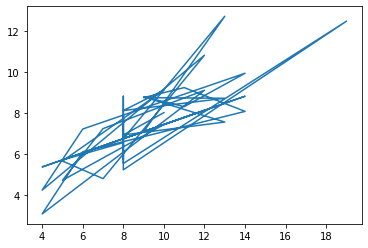

In [54]:
plt.plot(anscombe['x'], anscombe['y'])
plt.show()

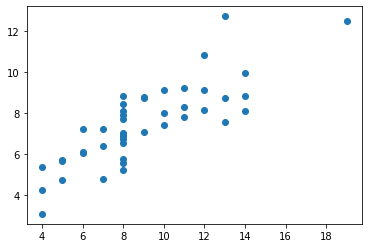

In [93]:
# use circles as the plotting symbol
plt.plot(anscombe['x'], anscombe['y'], 'o')  
plt.show()

## Scatter Plot

In [4]:
## plot a scatter plot of x and y with label



In [50]:
# suppose we just want to plot x and y for the dataset I 
# first, select only the dataset I


# Then, display a scatter plot for x and y in the selected dataset


## Bar Graph
- This is used to count discrete values.

In [7]:
#plt.bar(anscombe['dataset'], anscombe['x'])
#plt.show()

## Using subplots

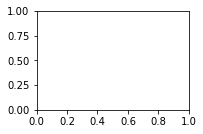

In [99]:
data_1 = anscombe[anscombe['dataset'] == 'I']
data_2 = anscombe[anscombe['dataset'] == 'II']
data_3 = anscombe[anscombe['dataset'] == 'III']
data_4 = anscombe[anscombe['dataset'] == 'IV']

fig = plt.figure()   # create a figure
axes1 = fig.add_subplot(2,2, 1)
#axes2 = fig.add_subplot(2,2,2)



# plot on each axis
#axes1.plot(data_1['x'], data_1['y'], 'o')
#axes2.plot(data_2['x'], data_2['y'], 'ro')

#axes1.set_title("Dataset I")
#axes2.set_title('Dataset II')



# add a title for the entire figure
#fig.suptitle('Anscombe Data')


# use a tight layout
#fig.tight_layout()

## Alternative Method

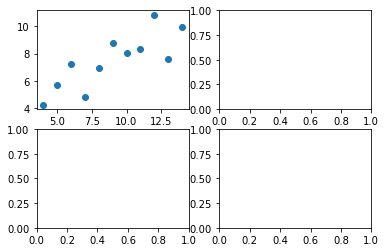

In [105]:
fig, ax = plt.subplots(2,2)
ax[0, 0].plot(data_1['x'], data_1['y'], 'o')

#ax[0, 0].set_title('Dataset I')

#ax[0, 1].plot(data_2['x'], data_2['y'], 'ro')


#ax[1, 0].plot(data_3['x'], data_3['y'], 'go')


#ax[1, 1].plot(data_4['x'], data_4['y'], 'o')


plt.show()

## Histogram
- It is used to visualize the distribution of a single quantitative variable.

In [106]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


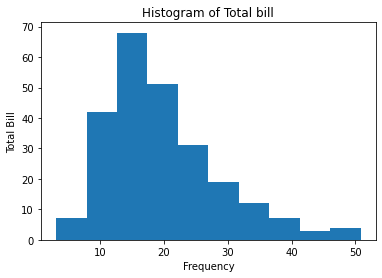

In [14]:
# plot a histogram of total bill
plt.hist(tips['total_bill'])
plt.xlabel('Frequency')
plt.ylabel('Total Bill')
plt.title('Histogram of Total bill')
plt.show()

## Alternative Method

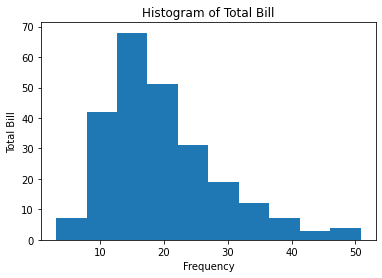

In [23]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.hist(tips['total_bill'])
axes.set_xlabel('Frequency')
axes.set_ylabel('Total Bill')
axes.set_title('Histogram of Total Bill')
plt.show()

## Boxplot

In [110]:
# subset the data for both male and female (tips_fem, tips_ma)

# plot the boxplot of the tip for both Male and Female


### Alternative Method

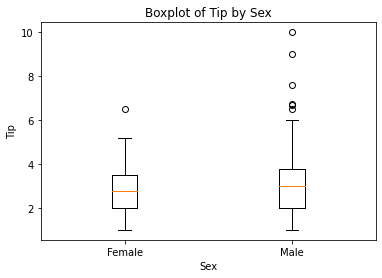

In [19]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.boxplot([tips_fem['tip'], tips_ma['tip']], labels = ['Female', 'Male'])
axes.set_xlabel('Sex')
axes.set_ylabel('Tip')
axes.set_title('Boxplot of Tip by Sex')
plt.show()

## Introduction to Seaborn
- It is visualization library built on matplotlib. It provides a higher-level interface for statistical graphics
- Seaborn comes pre-loaded with some datasets that can quickly be used to experiment. The link below can be 
used to access the data in seaborn:
    - https://github.com/mwaskom/seaborn-data

### Histogram and Density plot
- Histograms are created in seaborn using sns.distplot. The default distplot will plot both a histogram and 
a density plot (using a kernel density estimation). If we just want the histogram, we can set the kde parameter to false.

In [111]:
import seaborn as sns
data = sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


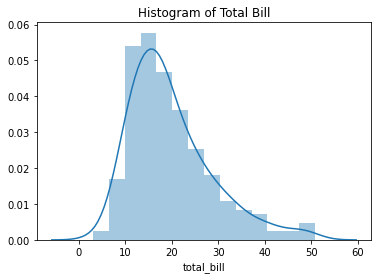

In [112]:
fig, ax = plt.subplots()
ax = sns.distplot(data['total_bill'])
ax.set_title('Histogram of Total Bill')
plt.show()

### Histogram

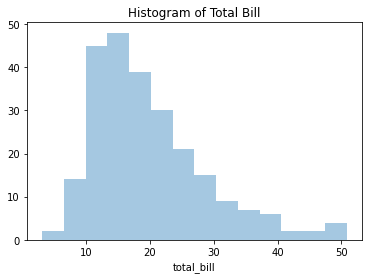

In [113]:
fig, ax = plt.subplots()
ax = sns.distplot(data['total_bill'], kde = False)
ax.set_title('Histogram of Total Bill')
plt.show()

### Density Plot

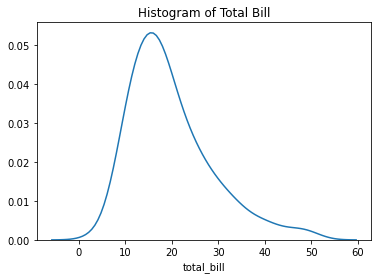

In [114]:
fig, ax = plt.subplots()
ax = sns.distplot(data['total_bill'], hist = False)
ax.set_title('Histogram of Total Bill')
plt.show()

### Bar or Count plot
- Used to count discrete values
- Use bar plot to display a categorical and a quantitative variable.

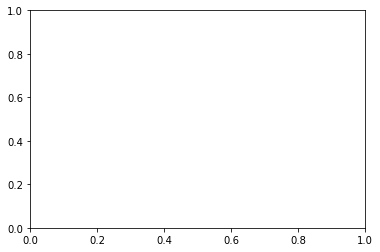

In [118]:
fig, ax = plt.subplots()
ax = sns.countplot(x = 'day', data = data)
#ax.set_xlabel('Day of the week')
#ax.set_ylabel('Frequency')
plt.show()

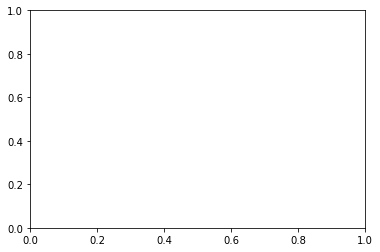

In [120]:
fig, ax = plt.subplots()
#ax = sns.barplot(x = 'day', y = 'tip', data = data)
#ax.set_xlabel('Day of the week')
#ax.set_ylabel('Tip')
##plt.show()

### Scatter plot
- This is used to visualize two quantitative variables.

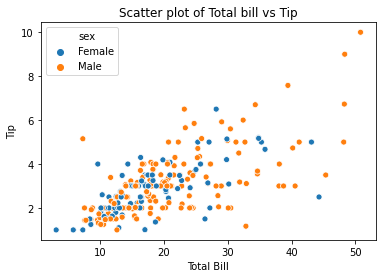

In [79]:
fig, ax  = plt.subplots()
ax = sns.scatterplot(x = 'total_bill', y = 'tip', hue = 'sex',
                    data = data)
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')
ax.set_title('Scatter plot of Total bill vs Tip')
plt.show()

## Exercise (Using Gapminder Data)
url = ("C:\Users\ajayi\OneDrive\Desktop\Class_Data\Data\gapminder.txt") # this should be your own directory

- Questions:
    - Find the number of features with missing values and include the missing values for each
    - How many rows and columns are in the data
    - Find the average GDP for the year 2006
    - Find the total GDP for each region for the year 2006
    - Fill the NAs in Child mortality and Fertility with 0, Population and gdp with its median
    - Create a bar graph/plot to visualize the GDP for each region in the year 2006 ( Try to rotate the xticks to avoid any overlap in the labels)
        - label: x-axis = Region, y-axis = GDP, title = Plot of GDP for each region
            

## Extra Exercise (Using Titanic data)
- url = ("http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls") 

- Questions:
    - What are the dimensions of the titanic data.
    - What variables have missing values and write the number of missing values each variable has.
    - Find the values of the unique category of the embarked feature including the Nas.
    - How many Males and Females are in the data.
    - You can also try several visualizations with the different features in the dataset

In [86]:

url = r"C:\Users\ajayi\OneDrive\Desktop\Class_Data\Data\gapminder.txt"
